In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

from astropy.io import fits
import astropy.units as u
from astropy.table import Table
import json
#plt.rcParams["font.family"]="Times New Roman"
#plt.rcParams["font.size"]="17"

Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'FLA-Car'

In [8]:
name_export='FLA-Car-N'

In [9]:
dist = 2130 #parsecs
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0=(0.9*pc)
pc,s0

(0.010326531407633116, 0.009293878266869804)

In [10]:
damiani_tab1_file = str(datapath_obs) +'/' + data_file + ".fits"
tab = Table.read(damiani_tab1_file)
tab

Id,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,[NII]sigmab,[NII]Nr,[NII]RVr,[NII]sigmar,HeINb,HeIRVb,HeIsigmab,HeINr,HeIRVr,HeIsigmar,[SII]1Nb,[SII]1RVb,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar,Setup
,deg,deg,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,
bytes29,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes10
SKY__10434580-5930497,160.9408,-59.51381,43435.14,-23.61,15.61,58918.77,4.94,13.38,2943.68,-31.66,14.71,11672.97,2.10,10.67,15235.06,-22.16,13.79,18024.73,5.19,10.38,998.76,-32.45,12.98,3398.53,4.20,10.39,727.14,-33.94,12.95,2696.04,3.09,10.02,sky_HR15N
SKY__10445840-5933062,161.2433,-59.55172,18256.59,-31.12,13.93,34321.84,5.23,15.21,1130.41,-24.70,15.34,4429.57,5.90,15.36,5555.79,-30.83,11.55,11833.37,5.01,13.96,1655.72,-4.40,19.00,736.73,9.41,9.97,1304.64,-4.45,19.94,519.97,8.08,9.21,sky_HR15N
SKY__10445040-5935467,161.2100,-59.59631,34377.49,-28.47,13.77,65136.86,-0.09,17.20,2528.38,-22.84,13.49,3541.20,9.64,14.93,11447.99,-28.24,10.67,22875.81,0.41,14.87,1733.36,-20.27,18.14,950.03,14.14,12.06,1352.34,-19.90,18.25,642.85,13.89,11.27,sky_HR15N
SKY__10443390-5934549,161.1413,-59.58192,34307.92,-29.53,14.51,30563.08,-15.04,23.81,10198.94,-25.17,12.26,3538.75,-12.05,25.62,10756.85,-29.39,12.29,11023.40,-15.58,23.19,2687.79,-21.74,12.12,740.18,7.11,32.20,2636.84,-22.17,11.68,582.76,6.44,32.56,sky_HR15N
SKY__10451730-5942205,161.3221,-59.70569,37527.72,-28.25,15.50,22025.68,14.37,14.07,6328.36,-28.63,13.16,2644.65,15.04,12.74,9441.61,-27.95,11.69,7676.87,13.18,13.84,1748.67,-25.49,12.72,836.83,16.73,11.97,1313.25,-26.18,12.99,610.61,16.64,11.96,sky_HR15N
SKY__10451970-5945404,161.3321,-59.76122,24245.06,-21.95,15.87,9017.24,11.42,15.95,4011.71,-17.86,13.23,2122.03,-7.92,27.32,7065.39,-17.61,13.23,1828.86,14.34,8.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N
SKY__10444430-5943333,161.1846,-59.72592,30519.80,-34.15,14.82,53892.78,7.00,14.64,7207.63,-33.96,12.22,5305.92,9.02,13.03,9951.92,-32.18,14.02,17619.99,7.92,12.14,2213.11,-31.97,11.54,1278.25,10.42,13.44,1662.81,-32.62,11.37,933.80,9.52,13.01,sky_HR15N
SKY__10440670-5947505,161.0279,-59.79736,8057.94,-24.88,16.14,10603.72,10.00,15.99,1587.50,-20.77,13.62,937.43,11.35,15.09,1064.69,-31.31,8.00,4338.92,5.87,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N


In [11]:
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,...,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,...,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,161.161726,-59.654315,62767.252113,-24.714007,15.885924,53873.122564,7.306363,16.018268,1631.775751,-8.739353,...,9.829619,1484.462829,9.367286,8.744284,1270.717298,-16.464157,9.631455,1203.455046,8.396328,8.680335
std,0.133125,0.080215,54846.830866,8.147913,2.757231,39423.863415,7.179267,5.690883,3522.508469,12.911389,...,6.643375,1633.447299,7.761613,6.028452,1931.147707,12.642477,6.675027,1461.860496,8.268913,6.144453
min,160.768700,-59.891890,0.000000,-51.840000,0.000000,0.000000,-25.070000,0.000000,0.000000,-44.180000,...,0.000000,0.000000,-16.630000,0.000000,0.000000,-39.300000,0.000000,0.000000,-47.760000,0.000000
25%,161.065825,-59.711945,28485.557500,-31.042500,14.320000,24528.595000,3.960000,13.850000,0.000000,-21.497500,...,0.000000,0.000000,0.000000,0.000000,0.000000,-27.327500,0.000000,0.000000,0.000000,0.000000
50%,161.155600,-59.657835,46452.860000,-26.800000,15.170000,45810.270000,7.635000,14.705000,0.000000,0.000000,...,12.010000,1135.875000,10.990000,11.110000,992.800000,-20.370000,11.700000,865.820000,9.485000,10.915000
75%,161.267100,-59.590390,76666.205000,-19.765000,16.707500,76315.320000,12.702500,16.310000,2243.900000,0.000000,...,13.950000,2091.252500,15.367500,12.155000,1706.045000,0.000000,13.857500,1642.482500,14.367500,12.087500
max,161.472400,-59.494310,483044.020000,0.000000,29.720000,372640.170000,32.650000,84.800000,44719.640000,7.920000,...,32.200000,12610.120000,54.680000,44.470000,29844.350000,2.940000,32.070000,13224.150000,61.700000,43.280000


In [12]:
int_b="[NII]Nb"
int_r="[NII]Nr"

In [13]:
rv_b="[NII]RVb"
rv_r="[NII]RVr"

In [14]:
sig_b="[NII]sigmab"
sig_r="[NII]sigmar"

In [15]:
m= tab["[NII]sigmab"] > 5

[Text(0.5, 0, 'Velocity')]

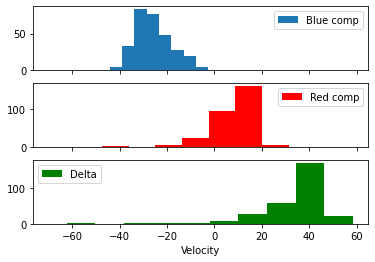

In [16]:
fig, [axb, axr, axd] = plt.subplots(3, 1, sharex=True)
axb.hist(tab["[NII]RVb"][m], label='Blue comp')
axr.hist(tab["[NII]RVr"][m], color='r', label='Red comp')
axd.hist(tab["[NII]RVr"][m] - tab["[NII]RVb"][m], color='g', label='Delta')
for ax in axb, axr, axd:
    ax.legend()
axd.set(xlabel='Velocity')

In [17]:
df = df.assign(Ha_dV=df["[NII]RVr"] - df["[NII]RVb"])
df = df.assign(Ha_close=(df['Ha_dV'] < 15.0).astype('S5') )
df = df.assign(Ha_rb_ratio=np.log10(df['[NII]Nr']/df['[NII]Nb']))

Blue component

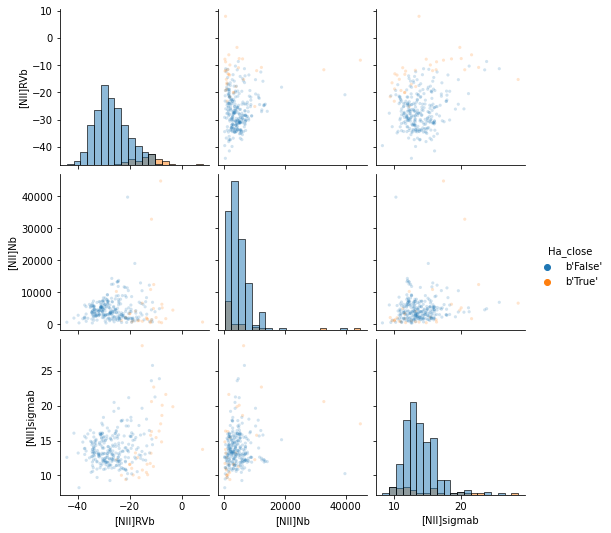

In [18]:
sns.pairplot(df[m], 
             vars=["[NII]RVb", "[NII]Nb", "[NII]sigmab"], 
             diag_kind='hist', hue="Ha_close", 
             plot_kws=dict(alpha=0.2, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.HaRVb, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaBlue.pdf', bbox_inches='tight')

Red Component

mask = df['Hasigmar'] > 35.0
df = df[~mask]


df.dropna(inplace=True)

sns.pairplot(df, 
             vars=["HaRVr", "HaNr", "Hasigmar"], 
             diag_kind='hist', hue="Ha_close",
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')

plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.HaRVr, alpha=0.1, color='k', label='CarR')

plt.legend()

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')

fig, ax = plt.subplots()
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaRed.pdf', bbox_inches='tight')

plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.075, color='k', label='blue')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.subplot(132)
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.075, color='k', label='red')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.show()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaLOSvsPOS.pdf', bbox_inches='tight')

Combining Components

In [19]:
def combine_moments(f1, v1, s1, f2, v2, s2, return_skew=False):
    """Find combined flux, mean velocity, and sigma for two components 
    with fluxes `f1` and `f2`, velocities `v1` and `v2`, and sigmas `s1` and `s2`. 
    Returns tuple of the combined moments: `f`, `v`, `s`."""
    f = f1 + f2
    v = (v1*f1 + v2*f2)/f
    ss = (s1*s1*f1 + s2*s2*f2)/f
    ss += f1*f2*(v1 - v2)**2 / f**2
    s = np.sqrt(ss)
    if return_skew:
        p1 = f1/f
        p2 = f2/f
        skew = p1*p2*(v1 - v2)*((1 - 2*p1)*(v1 - v2)**2 + 3*(s1**2 - s2**2))
        skew /= (p1*(p2*(v1 - v2)**2 + s1**2 - s2**2) + s2**2)**1.5
#        vmode = np.where(f1 > f2, v1, v2)
#        mskew = (v - vmode)/s
        return f, v, s, skew
    else:
        return f, v, s

In [20]:
fHa, vHa, sHa, gHa = combine_moments(
    df["[NII]Nr"],df["[NII]RVr"],df["[NII]sigmar"],
    df["[NII]Nb"],df["[NII]RVb"],df["[NII]sigmab"],
    return_skew=True
)

In [21]:
dfHa = pd.DataFrame(
    {'log_F': np.log10(fHa), 
     'V_mean': vHa, 
     'sigma': sHa, 
     'skew': gHa,
     'R_B': df.Ha_rb_ratio,
     'dV': df.Ha_dV,
     'close': df.Ha_close,
     'RAdeg': df.RAdeg,
     'DEdeg': df.DEdeg,
    }
).dropna()

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
dfHa.describe()

,log_F,V_mean,sigma,skew,R_B,dV,RAdeg,DEdeg
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,3.910548,-8.196340,21.864491,-0.076789,0.019500,33.302761,161.157630,-59.671920
std,0.303860,5.941294,4.043269,0.525686,0.466083,14.672732,0.149287,0.094145
min,2.689921,-23.316033,13.124773,-1.616410,-2.191957,-62.300000,160.768700,-59.891890
25%,3.765820,-12.100853,19.655687,-0.449154,-0.258897,31.440000,161.029900,-59.732560
50%,3.956286,-9.009547,21.515699,-0.063282,0.032454,36.670000,161.166200,-59.682890
75%,4.104722,-4.307160,23.851591,0.346549,0.319727,41.230000,161.275800,-59.582670
max,4.756627,6.224947,60.212472,1.139457,1.575879,58.470000,161.461300,-59.495060


Maps

In [23]:
points_of_interest = {
    "eta Car": [161.26517, -59.684425],
    "Tr 14": [160.98911, -59.547698],
    "WR 25": [161.0433, -59.719735],
    "Finger": [161.13133, -59.664035],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

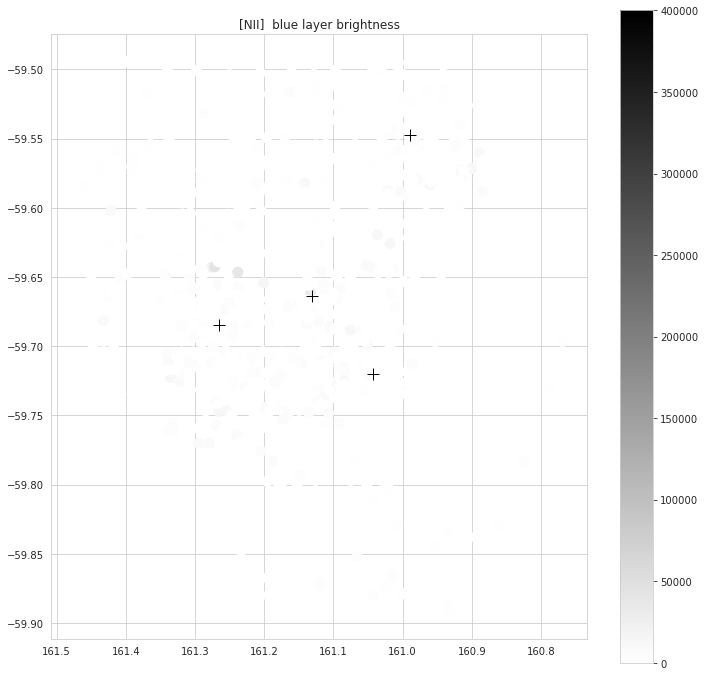

In [24]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df['[NII]Nb'], cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('[NII]  blue layer brightness')

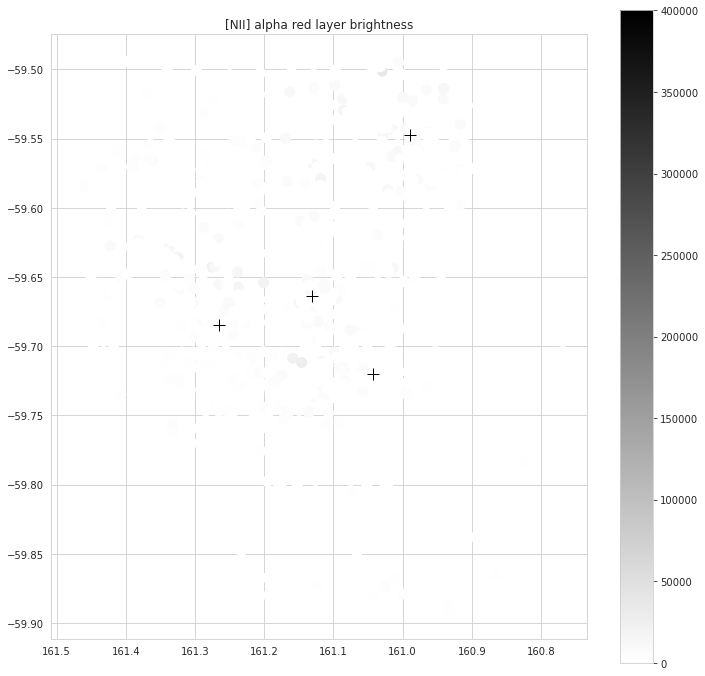

In [25]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df['[NII]Nr'], cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('[NII] alpha red layer brightness')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


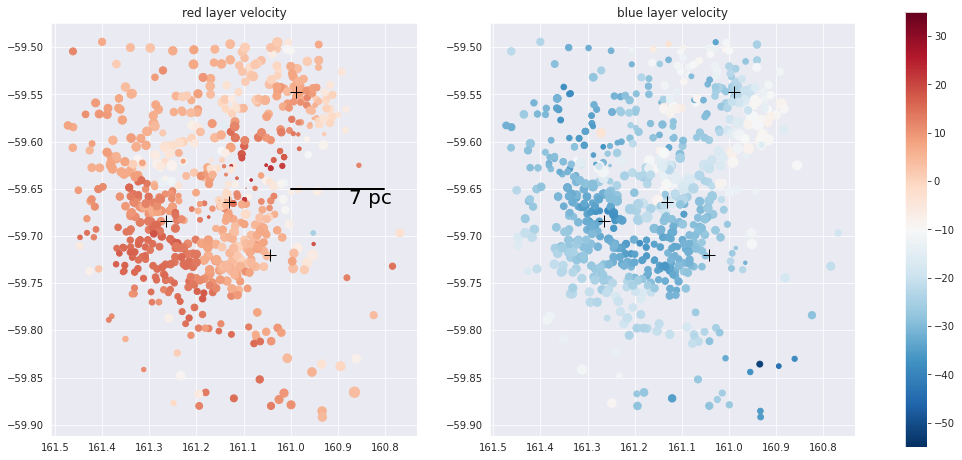

In [26]:
with sns.axes_style("darkgrid"):
    fig, [axr, axb] = plt.subplots(1, 2, figsize=(18, 8))
    scat = axr.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNr/df.HaNb) + 1.3), 
                      c=df.HaRVr, cmap='RdBu_r',
                      vmin=-55, vmax=35, 
                     )
    
    axr.text(0.53, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
    axr.axhline(y=-59.65, xmin=0.655, xmax=0.91, linewidth=2, color = 'k')
    
    scat = axb.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNb/df.HaNr) + 1.3), 
                      c=df.HaRVb, cmap='RdBu_r',
                      vmin=-55, vmax=35,
                     )
    
#    scat2 = ax.scatter(df.RAdeg, df.DEdeg, 
#                      s=50*(np.log10(df.HaNr) - 3), 
#                      c=df.HaRVr, cmap='RdBu_r',
#                      vmin=-55, vmax=35, marker='+',
#                     )
    fig.colorbar(scat, ax=[axr, axb])
    mark_points(axr)
    mark_points(axb)
    axr.invert_xaxis()
    axr.set_aspect(2.0)
    axb.invert_xaxis()
    axb.set_aspect(2.0)  
    axr.set_title('red layer velocity')
    axb.set_title('blue layer velocity')

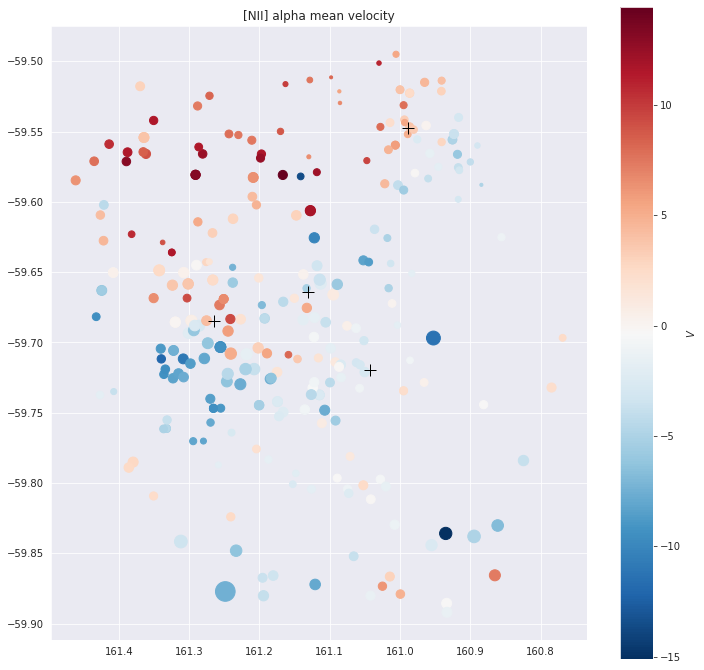

In [27]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(dfHa.RAdeg, dfHa.DEdeg, s=8*(dfHa.sigma - 12), c=dfHa.V_mean-dfHa.V_mean.mean(), cmap='RdBu_r')
    mark_points(ax)
    fig.colorbar(scat, ax=ax).set_label("$V$")
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title("[NII] alpha mean velocity")
    
#    ax.text(0.32, 0.2, '7 pc',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='black', fontsize=20)
#    ax.axhline(y=-59.83, xmin=0.14, xmax=0.395, linewidth=2, color = 'k')

Structure Fucntion

Dr. Will Blue

In [28]:
df2 = df[['RAdeg', 'DEdeg', 'HaRVb']].copy()
df2.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVb' : 'RV'}, inplace = True)
#df2.describe()

Red Dr. Will

In [29]:
df3 = df[['RAdeg', 'DEdeg', 'HaRVr']].copy()
df3.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVr' : 'RV'}, inplace = True)
#df3.describe()

Combined

In [30]:
dfHa

,log_F,V_mean,sigma,skew,R_B,dV,close,RAdeg,DEdeg
0,4.164848,-4.699002,17.827130,-0.947135,0.598291,33.76,b'False',160.9408,-59.51381
1,3.745073,-0.321344,19.684328,-0.359867,0.593126,30.60,b'False',161.2433,-59.55172
2,3.783159,-3.890060,21.500020,-0.042306,0.146308,32.48,b'False',161.2100,-59.59631
3,4.137914,-21.790363,17.708443,0.723680,-0.459705,13.12,b'True',161.1413,-59.58192
4,3.952938,-15.758972,23.799032,0.505256,-0.378923,43.67,b'False',161.3221,-59.70569
...,...,...,...,...,...,...,...,...,...
294,3.854446,-13.154960,13.203167,0.365847,-1.666849,36.29,b'False',160.8843,-59.58792
295,3.591806,-10.030886,16.986249,0.199986,0.236524,4.96,b'True',160.9832,-59.65092
296,3.771430,-11.101505,16.395062,0.134780,0.300258,3.81,b'True',160.9172,-59.59822
297,3.956286,-13.997098,25.474045,-0.002020,-0.175549,43.05,b'False',161.0892,-59.65867


In [31]:
df4 = dfHa[['RAdeg', 'DEdeg', 'V_mean','log_F','sigma']].copy()
df4.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'V_mean' : 'RV', 'log_F': 'I', 'sigma':'Sigma'}, inplace = True)
#df4

Data to pc

In [32]:
(((df4.X[1]-df4.X[0])**2)-((df4.Y[1]-df4.Y[0])**2))**0.5

0.30011511441446137

Export archives

List Form

In [33]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
 #       'pix' : pix,
         name_export : np.array(df4),
      }
data_export_list

{'name': 'FLA-Car-N',
 'pc': 0.010326531407633116,
 's0': 0.009293878266869804,
 'FLA-Car-N': array([[160.9408    , -59.51381   ,  -4.69900229,   4.16484785,
          17.82713044],
        [161.2433    , -59.55172   ,  -0.3213436 ,   3.74507323,
          19.68432789],
        [161.21      , -59.59631   ,  -3.89006014,   3.78315864,
          21.50001977],
        ...,
        [160.9172    , -59.59822   , -11.10150477,   3.7714302 ,
          16.39506234],
        [161.0892    , -59.65867   , -13.99709802,   3.95628612,
          25.4740452 ],
        [160.8557    , -59.62514   ,  -9.27162389,   3.07518185,
          18.60468782]])}

In [34]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [35]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [36]:
!jupyter nbconvert --to script --no-prompt otv-FLA-Car-N.ipynb

[NbConvertApp] Converting notebook otv-FLA-Car-N.ipynb to script
[NbConvertApp] Writing 9653 bytes to otv-FLA-Car-N.py


In [37]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 12.87987494468689 seconds ---
